In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib
from sklearn.decomposition import PCA


In [101]:
df=pd.read_csv('Auto_Insurance_Claims_amount.csv')
df

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Country                        9134 non-null   object 
 2   State Code                     9134 non-null   object 
 3   State                          9134 non-null   object 
 4   Claim Amount                   9134 non-null   float64
 5   Response                       9134 non-null   object 
 6   Coverage                       9134 non-null   object 
 7   Education                      9134 non-null   object 
 8   Effective To Date              9134 non-null   object 
 9   EmploymentStatus               9134 non-null   object 
 10  Gender                         9134 non-null   object 
 11  Income                         9134 non-null   int64  
 12  Location Code                  9134 non-null   o

In [103]:
#no missing value in dataset
df.isin(['?']).sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [104]:
df['Country'].value_counts()

US    9134
Name: Country, dtype: int64

In [105]:
#drop country and customer column .bcz country has same repeated value across all data point and customer is just a unique cust id
df=df.drop(['Country','Customer'],axis=1)
df.tail(5)

,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large
9133,MO,Missouri,261.183687,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Other,Call Center,369.600000,Two-Door Car,Medsize


In [106]:
df['Number of Open Complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

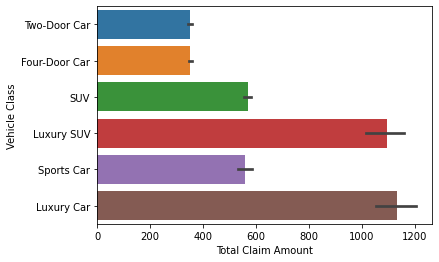

In [107]:
sns.barplot(data=df,y='Vehicle Class',x='Total Claim Amount')
#For Luxury SUV and cars total claim amount is more compared to others

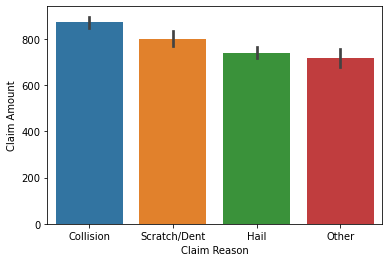

In [108]:
sns.barplot(data=df,y='Claim Amount',x='Claim Reason')
#more claim for collision followed by scratch/dent


In [109]:
#convert string data to numeric
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelencoder=LabelEncoder()
        df[col]=labelencoder.fit_transform(df[col])


In [110]:
df.dtypes

State Code                         int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

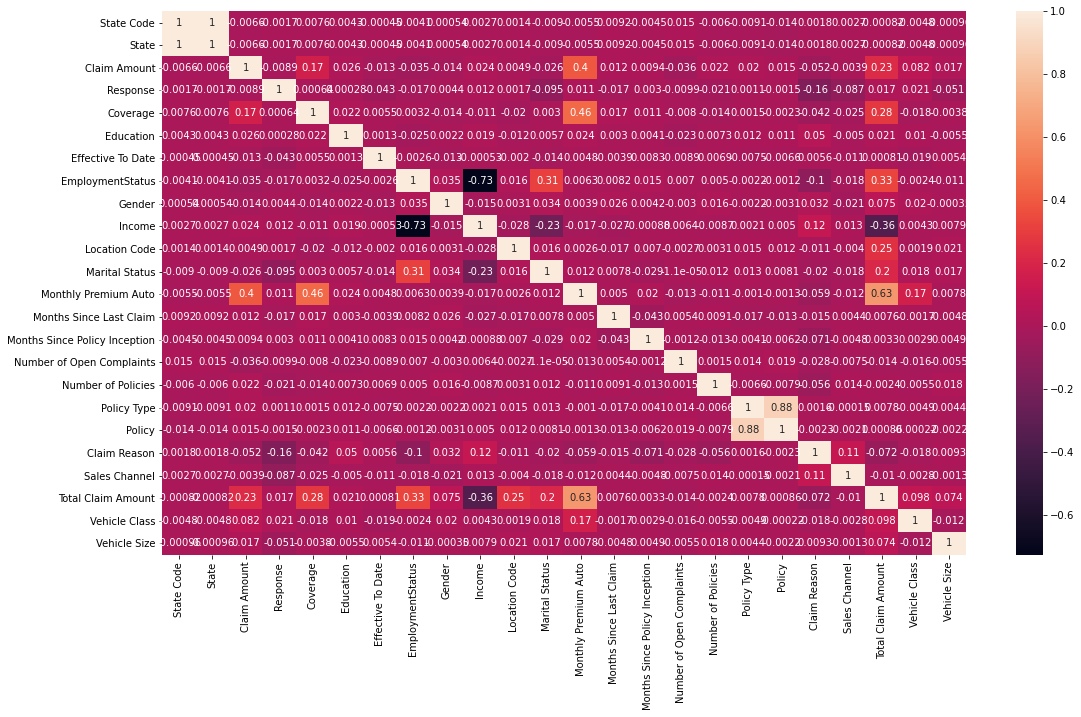

In [111]:
corr_=df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(data=corr_,annot=True)

In [112]:
df=df.drop(['State','EmploymentStatus'],axis=1)

In [113]:
df.skew()

State Code                       0.021065
Claim Amount                     3.032280
Response                         2.037567
Coverage                         1.031310
Education                        0.333148
Effective To Date                0.033899
Gender                           0.039866
Income                           0.286887
Location Code                    0.009511
Marital Status                  -0.107553
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Policy Type                     -0.468383
Policy                          -0.427639
Claim Reason                     0.733526
Sales Channel                    0.506774
Total Claim Amount               1.714966
Vehicle Class                    0.395146
Vehicle Size                     0.072742
dtype: float64

In [115]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

In [116]:
#remove outliers
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
df.shape

(8802, 22)

In [117]:
x=df.drop('Claim Amount',axis=1)
y=df['Claim Amount']
print(x.shape,y.shape)

(8802, 21) (8802,)


In [118]:
standardScaler=StandardScaler()
x=standardScaler.fit_transform(x)
x

array([[-0.5554027 , -0.40873517, -0.77590131, ...,  0.13649621,
         1.49254334, -0.17110644],
       [ 0.96968062, -0.40873517,  1.07097939, ...,  1.59836847,
        -0.91259863, -0.17110644],
       [ 1.73222227, -0.40873517,  1.82394188, ...,  0.660319  ,
         1.49254334, -0.17110644],
       ...,
       [ 0.20713896, -0.40873517,  1.07097939, ...,  1.1125339 ,
        -0.91259863, -0.17110644],
       [ 0.20713896, -0.40873517,  1.07097939, ...,  0.93005177,
        -0.91259863, -2.02817042],
       [ 0.20713896, -0.40873517,  1.07097939, ...,  0.08188706,
         1.49254334, -0.17110644]])

In [120]:
lr_reg=LinearRegression()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()
lasso=Lasso()
ridge=Ridge()
elasticNet=ElasticNet()

In [121]:
models=[]
models.append(('Linear Regression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))
models.append(('Lasso',lasso))
models.append(('Ridge',ridge))
models.append(('ElasticNet',elasticNet))

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [123]:
#finding and storing matrix model wise
cross_val_list=[]
r2_list=[]
model_name_list=[]
mse_score_list=[]
mae_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_list.append(r2_score(y_test,y_pred))
    mse_score_list.append(mean_squared_error(y_test,y_pred))
    mae_score_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [124]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'train_score':score_list,'r2_score':r2_list,'mse_score':mse_score_list,'mae_score':mae_score_list})
df_matrix

,Estimator_Name,cross_val_Score,train_score,r2_score,mse_score,mae_score
0,Linear Regression,0.362633,0.363641,0.374114,0.004672,0.053938
1,SVR,0.128654,0.156753,0.163019,0.006248,0.072274
2,DecisionTreeRegressor,0.857452,1.000000,0.854688,0.001085,0.014163
3,KNeighborsRegressor,0.364862,0.575699,0.359796,0.004779,0.050287
4,SGDRegressor,0.359878,0.358936,0.378808,0.004637,0.053924
5,Gradient Boost Regressor,0.919548,0.924967,0.921011,0.000590,0.013101
6,Ada Boost Regressor,0.881777,0.882910,0.884767,0.000860,0.021198
7,RandomForestRegressor,0.925988,0.989581,0.926767,0.000547,0.011617
8,Lasso,-0.000592,0.000000,-0.000606,0.007470,0.069693
9,Ridge,0.362634,0.363641,0.374113,0.004672,0.053938


In [126]:
#RandomForestRegressor works good comapre to other model...
joblib.dump(rand_reg,'Auto_Insurance_Claim.pkl')

['Auto_Insurance_Claim.pkl']